examining trends on a state-by-state basis

includes territories as of right now, but should consider if these should remain in or not

In [152]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv("../data/distribution/merged_filtered.csv")

# remove foreign
df = df[(df['STATE'].isna() == False) & (df['STATE'] != 'FO')]

df.isna().sum()

EIN            0
FISYR          0
NAME          30
STATE          0
NTEE1          0
ADDRESS       64
CITY          62
ZIP         7439
SUBSECCD       0
NTMAJ5         0
NTMAJ10        0
NTMAJ12        0
MAJGRPB        0
CONT           0
dtype: int64

In [117]:
states = df['STATE'].unique().tolist()
states.sort()

print(states)

['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'FM', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MH', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY']


In [107]:
no_outliers = None

# for each state
for state in states:
    st_df = df[df['STATE'] == state]
    
    # find outliers
    q1 = st_df['CONT'].quantile(0.25)
    q3 = st_df['CONT'].quantile(0.75)
    iqr = q3 - q1
    high = q3 + 1.5 * iqr
    

    # remove outliers
    st_df = st_df[st_df['CONT'] < high]
    
    no_outliers = pd.concat([no_outliers, st_df])

In [87]:
df.describe()

,EIN,FISYR,SUBSECCD,CONT
count,4.327050e+05,432705.000000,432705.0,4.327050e+05
mean,4.246004e+08,2011.521399,3.0,1.942644e+06
std,2.593163e+08,6.079453,0.0,2.588015e+07
min,1.007806e+07,1998.000000,3.0,1.000000e+00
25%,2.260691e+08,2005.000000,3.0,3.073500e+04
50%,3.826046e+08,2014.000000,3.0,1.317340e+05
75%,5.919053e+08,2017.000000,3.0,6.421970e+05
max,9.960157e+08,2020.000000,3.0,9.265120e+09


In [86]:
no_outliers.describe()

,EIN,FISYR,SUBSECCD,CONT
count,3.701600e+05,370160.000000,370160.0,3.701600e+05
mean,4.209255e+08,2011.432248,3.0,2.499661e+05
std,2.563857e+08,6.089164,0.0,3.795651e+05
min,1.007806e+07,1998.000000,3.0,1.000000e+00
25%,2.260600e+08,2005.000000,3.0,2.384000e+04
50%,3.821135e+08,2014.000000,3.0,8.841100e+04
75%,5.825151e+08,2017.000000,3.0,3.078912e+05
max,9.960157e+08,2020.000000,3.0,4.718311e+06


In [150]:
ma_orig = df[df['STATE'] == 'MA']
tn_orig = df[df['STATE'] == 'TN']

ma = no_outliers[no_outliers['STATE'] == 'MA']
tn = no_outliers[no_outliers['STATE'] == 'TN']

head = ['dataset', 'contains outliers', 'mean', 'median', 'max']
table = [['full', 'yes', df['CONT'].mean(), df['CONT'].median(), df['CONT'].max()], 
         ['full', 'no', no_outliers['CONT'].mean(), no_outliers['CONT'].median(), no_outliers['CONT'].max()], 
        ['TN', 'yes', tn_orig['CONT'].mean(), tn_orig['CONT'].median(), tn_orig['CONT'].max()], 
         ['TN', 'no', tn['CONT'].mean(), tn['CONT'].median(), tn['CONT'].max()],
        ['MA', 'yes', ma_orig['CONT'].mean(), ma_orig['CONT'].median(), ma_orig['CONT'].max()], 
         ['MA', 'no', ma['CONT'].mean(), ma['CONT'].median(), ma['CONT'].max()]]

print(tabulate(table, headers=head))

dataset    contains outliers                mean    median          max
---------  -------------------  ----------------  --------  -----------
full       yes                       1.94264e+06    131734  9.26512e+09
full       no                   249966               88411  4.71831e+06
TN         yes                       3.47343e+06    132038  1.66719e+09
TN         no                   214820               91484  1.35176e+06
MA         yes                       5.40678e+06    109536  9.26512e+09
MA         no                   224139               69718  1.62807e+06


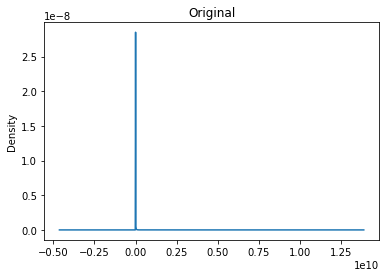

<AxesSubplot:title={'center':'Without Outliers'}, ylabel='Density'>

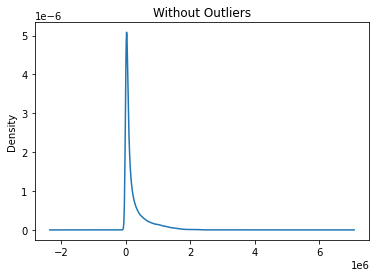

In [155]:
# distributions - note change from original to filtered
df['CONT'].plot(kind='kde', title='Original')
plt.show()

no_outliers['CONT'].plot(kind='kde', title='Without Outliers')

In [92]:
no_outliers.sort_values('CONT').tail()

,EIN,FISYR,NAME,STATE,NTEE1,ADDRESS,CITY,ZIP,SUBSECCD,NTMAJ5,NTMAJ10,NTMAJ12,MAJGRPB,CONT
338488,660430826,2018.0,CENTRO DE SERVICIOS PRIMARIOS DE,PR,E,PO BOX 697,PATILLAS,00723-0697,3.0,HE,HE,HE,E,4671942.0
338475,660352014,2017.0,HOSPITAL GENERAL DE CASTANER INC,PR,E,PO BOX 1003,CASTANER,00631-1003,3.0,HE,HE,EH,EH,4692288.0
114095,431131436,2005.0,LUPUS FOUNDATION OF AMERICA INC,DC,G,2000 L ST NW STE 710,WASHINGTON,20036-4916,3.0,HE,HE,HE,G,4709711.0
378627,660426667,2018.0,SERVICIOS DE SALUD PRIMARIOS DE,PR,E,PO BOX 2045,BARCELONETA,00617-2045,3.0,HE,HE,HE,E,4716358.0
171317,521920603,2012.0,HOME CARE PARTNERS INC,DC,E,1234 MASSACHUSETTS AVENUE NW NO,WASHINGTON,20005-4526,3.0,HE,HE,HE,E,4718311.0


Originally I all territories contained in the dataset, but opted remove foreign states since they greatly skewed the data (plus I think we're looking US economy?). Without foreign states, the max contributions (outliers removed) dipped by ~30M - the max contributions from the new filtered data (above) seem reasonable. Some of the organizations receive the majority of their contributions from government grants while others gain it mostly from direct public support (found from manually checking their 990 forms), so unless we can find data that breaks down this difference, there doesn't seem to be a clear way to differentiate which orgs are funded mainly by public donation/altruism.